In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

from pyswi import SwiModel

In [2]:
# grid
nlay = 1
L = 2000 # length of aquifer, m
Lcoast = 1000
ncoast = 20 # number of cells to represent coast on left and right
ncol = 40 + 2 * ncoast # number of columns
delx = (L + 2 * Lcoast) / ncol # computed cell size, m

# parameters
k = 10 # horizontal hydraulic conductivity, m/d
S = 0.2 # storage coefficient, -
Se = 1e-4 # specific storage coef, m^(-1)
zt = 0 * np.ones(ncol) # aquifer top, m
zb = -50 * np.ones(ncol) # aquifer bottom, m
rhof = 1000 # freshwater density, kg/m3
rhos = 1025 # saltwater density, kg/m3
hstar = 0 # head in ghb cells, m
c = 100 # resistance of sea bottom, m

# bc
N = 0.001 # recharge, m/d
Qf = [[0, icol, N * delx] for icol in range(ncoast, ncoast + 40)]
ghb = []
for icol in range(ncoast):
    ghb.append((0, icol, hstar, delx / c))
for icol in range(ncol - ncoast, ncol):
    ghb.append((0, icol, hstar, delx / c))

# initial conditions
hfini = np.zeros(ncol)
hsini = np.zeros(ncol)

nstep = 20
delt = 2000

In [3]:
ml = SwiModel(nlay, ncol, delx, xleftc=-2000)
ml.tdis(nstep, delt, hfini, hsini)
ml.aquifer(k=k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
ml.set_source(Qf)
#ml.set_ghb(ghb, ghb)
ml.set_ghb([], ghb)
ml.set_drain(ghb)
hf, hs, zeta = ml.simulate(silent=True)

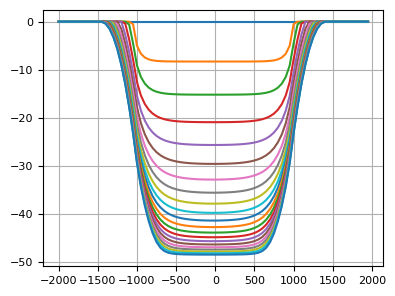

In [4]:
for i in range(nstep + 1):
    plt.plot(ml.xc, zeta[i, 0])
plt.grid()

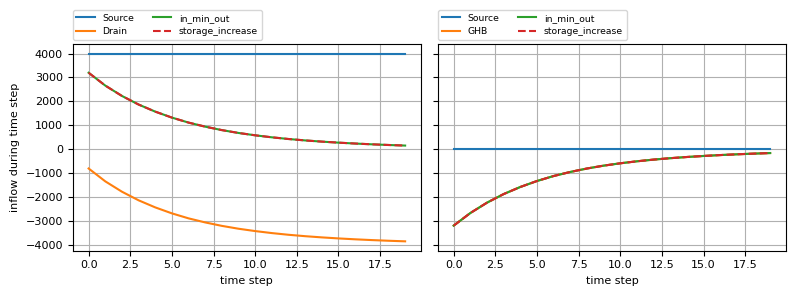

In [5]:
plt.figure(figsize=(8, 3))
ax1 = plt.subplot(121)
bud = ml.budget_fresh(hf, hs)
bud['layer 0'][['Source', 'Drain', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + ['--']).legend (loc=(0, 1.02), ncol=2, fontsize='small')
#
ax2 = plt.subplot(122, sharey=ax1)
bud = ml.budget_salt(hf, hs)
bud['layer 0'][['Source', 'GHB', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax2, style=3 * ['-'] + ['--']).legend (loc=(0, 1.02), ncol=2, fontsize='small');

In [6]:
ml = SwiModel(nlay, ncol, delx, xleftc=-2000)
ml.tdis(1, 1, hfini, hsini)
ml.aquifer(k=k, S=0, Se=0, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
ml.set_source(Qf)
ml.set_ghb([], ghb)
ml.set_drain(ghb)
hf1, zeta1 = ml.simulate_freshonly(silent=True)
#
ml = SwiModel(nlay, ncol, delx, xleftc=-2000)
ml.tdis(nstep, delt, hf1[-1], hsini)
ml.aquifer(k=k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
Qf = [[0, icol, 0.2 * N * delx] for icol in range(ncoast, ncoast + 40)]
ml.set_source(Qf)
ml.set_ghb([], ghb)
ml.set_drain(ghb)
hf2, hs2, zeta2 = ml.simulate(silent=True)

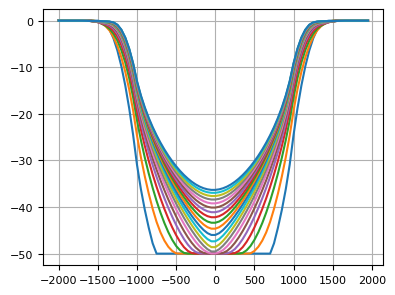

In [7]:
for i in range(nstep + 1):
    plt.plot(ml.xc, zeta2[i, 0])
plt.grid()

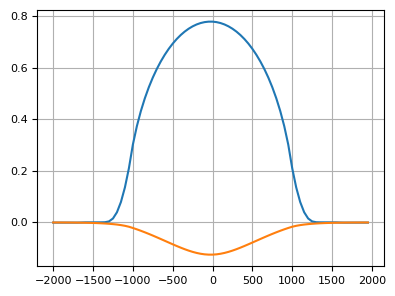

In [8]:
plt.plot(ml.xc, hf2[-1, 0])
plt.plot(ml.xc, hs2[-1, 0])
plt.grid()

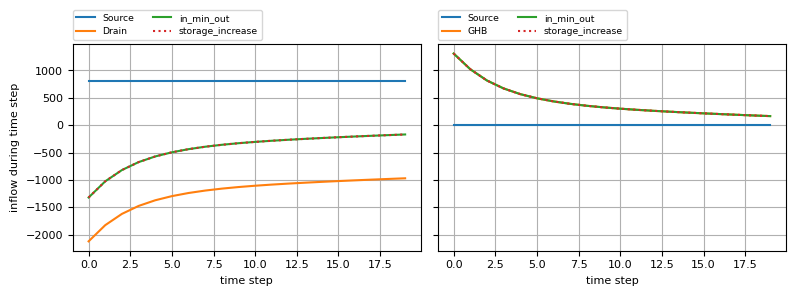

In [9]:
plt.figure(figsize=(8, 3))
ax1 = plt.subplot(121)
bud = ml.budget_fresh(hf2, hs2)
bud['layer 0'][['Source', 'Drain', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax1, style=3 * ['-'] + [':']).legend (loc=(0, 1.02), ncol=2, fontsize='small')
#
ax2 = plt.subplot(122, sharey=ax1)
bud = ml.budget_salt(hf2, hs2)
bud['layer 0'][['Source', 'GHB', 'in_min_out', 'storage_increase']].plot(grid=True, xlabel='time step', 
                    ylabel='inflow during time step', ax=ax2, style=3 * ['-'] + [':']).legend (loc=(0, 1.02), ncol=2, fontsize='small');